# Importing Basic Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('D:\PYTHON\Data science\projects/classification/fake news classifier/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [6]:
df.drop(columns = ['id','text','author'],inplace=True)

In [7]:
df.head()

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [8]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [9]:
df.isnull().sum()

title    558
label      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB


In [11]:
#drop null values

df.dropna(inplace=True)

In [12]:
df.head()

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [13]:
df.shape

(20242, 2)

In [14]:
df.duplicated().sum()

439

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(19803, 2)

# EDA

In [17]:
df['label'].value_counts()

0    10381
1     9422
Name: label, dtype: int64

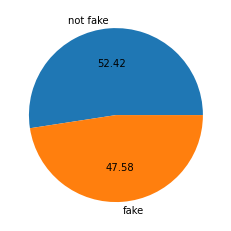

In [18]:
plt.pie(df['label'].value_counts(), labels=['not fake','fake'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['title'].apply(len)

In [22]:
df.head()

,title,label,num_characters
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,55
2,Why the Truth Might Get You Fired,1,33
3,15 Civilians Killed In Single US Airstrike Hav...,1,63
4,Iranian woman jailed for fictional unpublished...,1,93


In [23]:
# num of words
df['num_words'] = df['title'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,title,label,num_characters,num_words
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81,19
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,55,11
2,Why the Truth Might Get You Fired,1,33,7
3,15 Civilians Killed In Single US Airstrike Hav...,1,63,10
4,Iranian woman jailed for fictional unpublished...,1,93,14


In [25]:
df['num_sentences'] = df['title'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,title,label,num_characters,num_words,num_sentences
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81,19,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,55,11,1
2,Why the Truth Might Get You Fired,1,33,7,1
3,15 Civilians Killed In Single US Airstrike Hav...,1,63,10,1
4,Iranian woman jailed for fictional unpublished...,1,93,14,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,19803.000000,19803.000000,19803.000000
mean,74.579912,14.202242,1.101702
std,23.054653,4.908809,0.357666
min,3.000000,1.000000,1.000000
25%,61.000000,11.000000,1.000000
50%,76.000000,14.000000,1.000000
75%,88.000000,17.000000,1.000000
max,456.000000,79.000000,7.000000


In [28]:
# Not Fake
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10381.000000,10381.000000,10381.000000
mean,79.609961,15.579135,1.114055
std,15.556547,3.702525,0.390267
min,22.000000,5.000000,1.000000
25%,70.000000,13.000000,1.000000
50%,81.000000,16.000000,1.000000
75%,89.000000,18.000000,1.000000
max,175.000000,35.000000,5.000000


In [29]:
# Fake
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9422.000000,9422.000000,9422.000000
mean,69.037890,12.685205,1.088092
std,28.141747,5.581524,0.317364
min,3.000000,1.000000,1.000000
25%,51.000000,9.000000,1.000000
50%,67.000000,12.000000,1.000000
75%,84.000000,16.000000,1.000000
max,456.000000,79.000000,7.000000


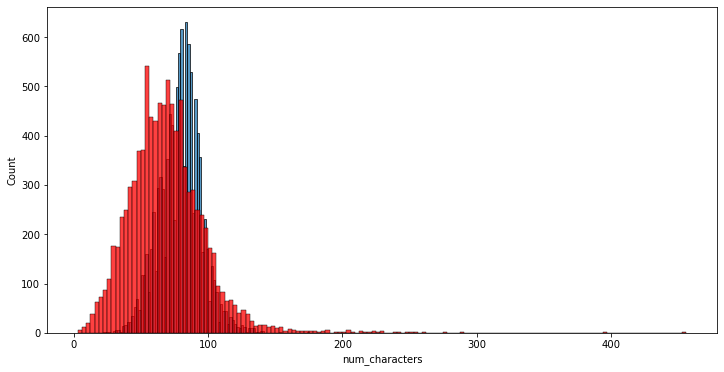

In [30]:
# characters

plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')
plt.show()

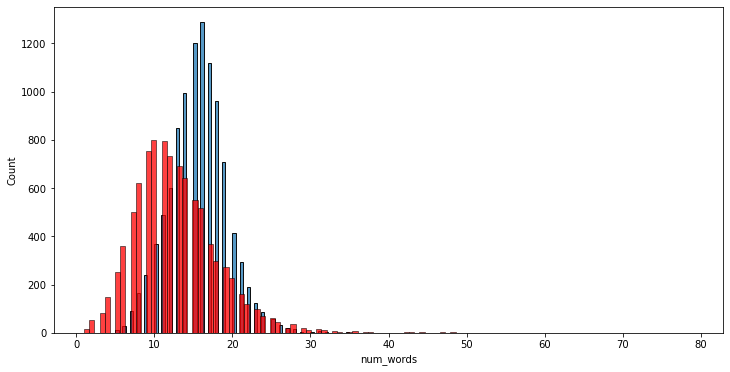

In [31]:
# words
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')
plt.show()

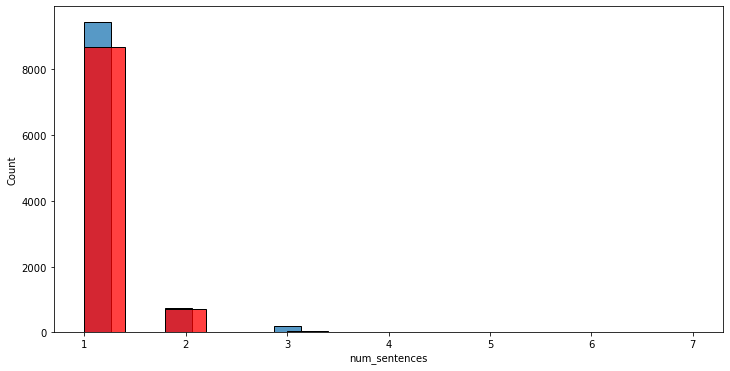

In [32]:
# sentences
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_sentences'])
sns.histplot(df[df['label'] == 1]['num_sentences'],color='red')
plt.show()

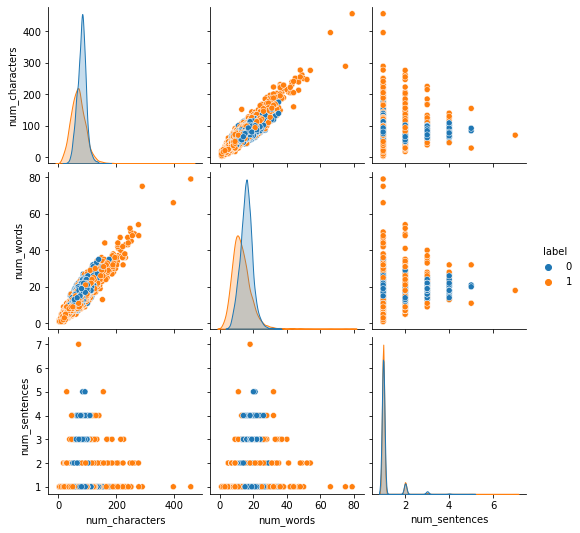

In [33]:
sns.pairplot(df,hue='label')
plt.show()

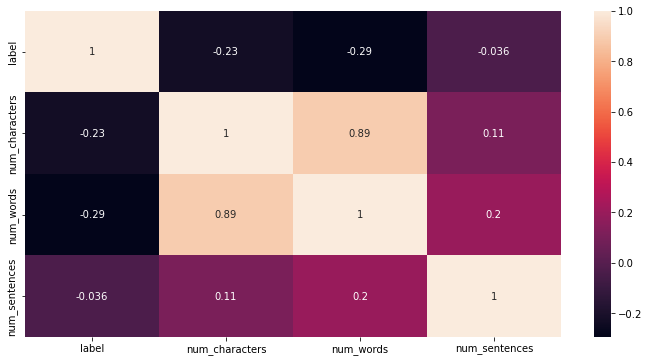

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data preprocessing

In [35]:
import nltk
import re
from nltk.corpus import stopwords
import string

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum(): #remove special charactes except alphanumeric
            y.append(i)
    
    text = y[:]
    y.clear()
    
    #remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #word stemming
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [39]:
transform_text("We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey.")

'even see comey letter jason chaffetz tweet darrel lucu octob 30 2016 subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ licens apolog keith olbermann doubt worst person world director jame comey'

In [40]:
df['transformed_text'] = df['title'].apply(transform_text)

In [41]:
df.head()

,title,label,num_characters,num_words,num_sentences,transformed_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81,19,1,hous dem aid even see comey letter jason chaff...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,55,11,1,flynn hillari clinton big woman campu breitbart
2,Why the Truth Might Get You Fired,1,33,7,1,truth might get fire
3,15 Civilians Killed In Single US Airstrike Hav...,1,63,10,1,15 civilian kill singl us airstrik identifi
4,Iranian woman jailed for fictional unpublished...,1,93,14,1,iranian woman jail fiction unpublish stori wom...


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
fake_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

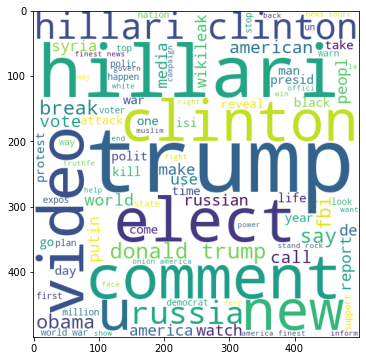

In [44]:
plt.figure(figsize=(18,6))
plt.imshow(fake_wc)
plt.show()

In [45]:
not_fake_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

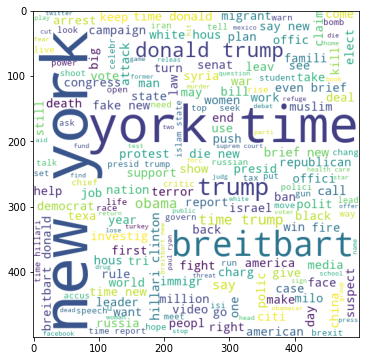

In [46]:
plt.figure(figsize=(18,6))
plt.imshow(not_fake_wc)
plt.show()

In [47]:
fake_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        fake_corpus.append(word)

In [48]:
len(fake_corpus)

72182

In [49]:
from collections import Counter

In [50]:
Counter(fake_corpus).most_common(30)

[('trump', 1362),
 ('hillari', 962),
 ('clinton', 887),
 ('elect', 533),
 ('new', 413),
 ('video', 381),
 ('us', 375),
 ('news', 337),
 ('comment', 336),
 ('russia', 325),
 ('fbi', 323),
 ('war', 315),
 ('email', 297),
 ('america', 289),
 ('vote', 283),
 ('world', 270),
 ('obama', 268),
 ('donald', 259),
 ('say', 222),
 ('break', 203),
 ('american', 201),
 ('day', 198),
 ('de', 185),
 ('state', 182),
 ('presid', 181),
 ('wikileak', 177),
 ('support', 171),
 ('campaign', 170),
 ('2016', 164),
 ('report', 161)]

In [51]:
d1 = pd.DataFrame(Counter(fake_corpus).most_common(30))[0]

In [52]:
d1.head()

0      trump
1    hillari
2    clinton
3      elect
4        new
Name: 0, dtype: object

In [53]:
d2 = pd.DataFrame(Counter(fake_corpus).most_common(30))[1]

In [54]:
d2.head()

0    1362
1     962
2     887
3     533
4     413
Name: 1, dtype: int64

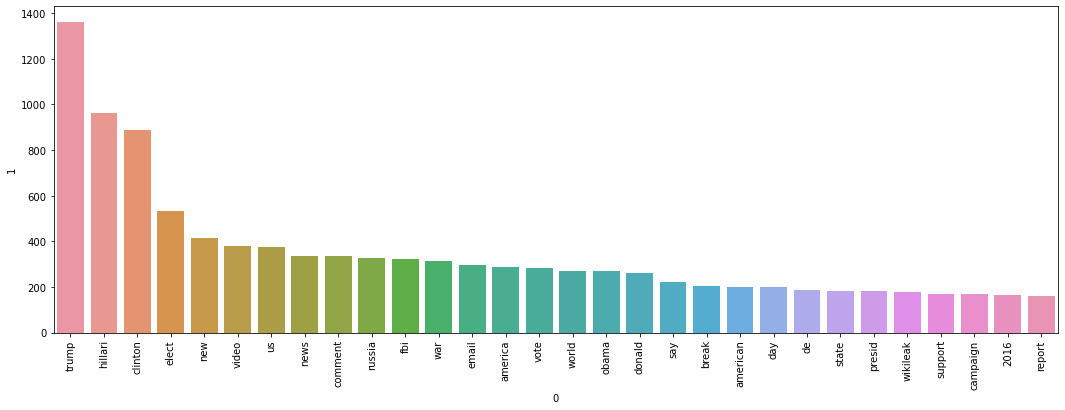

In [55]:
plt.figure(figsize = (18,6))
sns.barplot(x=d1,y=d2)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
not_fake_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        not_fake_corpus.append(word)

In [57]:
len(not_fake_corpus)

96764

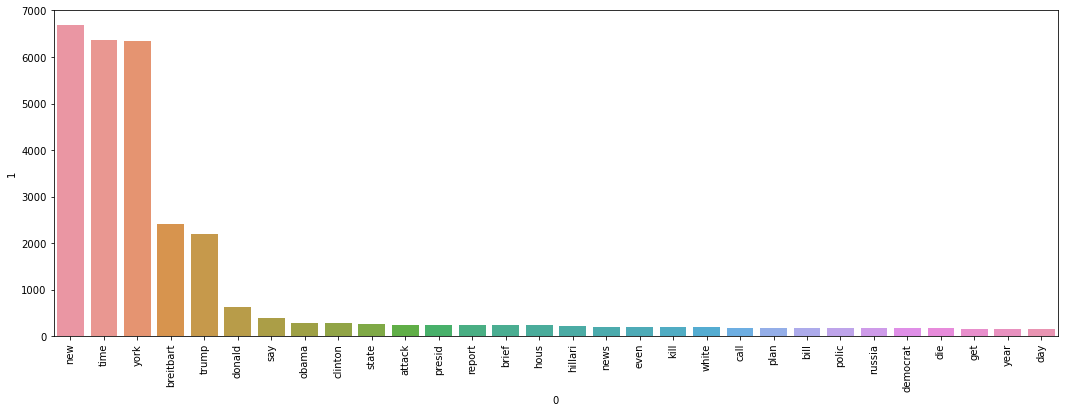

In [58]:
plt.figure(figsize = (18,6))
sns.barplot(x=pd.DataFrame(Counter(not_fake_corpus).most_common(30))[0],y=pd.DataFrame(Counter(not_fake_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## model building

In [68]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [69]:
X = df['transformed_text']

In [70]:
y = df['label']

In [71]:
### Vocabulary size
voc_size=10000

In [72]:
onehot_repr=[one_hot(words,voc_size)for words in df['transformed_text']] 
onehot_repr

[[8438, 320, 2492, 9135, 2395, 3826, 9048, 8860, 6426, 4021],
 [8051, 294, 3647, 5484, 5144, 1669, 3754],
 [7282, 140, 3624, 2591],
 [5378, 9417, 3631, 9685, 6247, 5571, 7188],
 [2237, 5144, 7640, 7166, 5620, 3078, 5144, 7998, 6443, 2346],
 [7639,
  8653,
  675,
  6869,
  7147,
  7903,
  6301,
  9116,
  4514,
  4320,
  7640,
  4920,
  6113,
  8907,
  3754],
 [7764, 7764, 8263, 7434, 8400, 336, 2719, 4267, 5952, 5385, 6850, 4697, 6175],
 [5875, 1583, 3733, 2674, 2382, 3441, 8910, 7652, 1379, 3319, 9069],
 [7459,
  3862,
  1457,
  6047,
  7903,
  3118,
  3934,
  5548,
  7324,
  9088,
  1379,
  3319,
  9069],
 [3884, 9560, 4747, 4041, 7903, 6497, 1379, 3319, 9069],
 [8188, 4633, 1016, 7844, 8334, 2958, 7903, 3947],
 [9148, 8902, 2274, 3248, 2268, 2589, 2394, 7239],
 [9536, 3238, 4339, 1989, 3689, 8298, 1433, 6733, 2697, 6243, 820],
 [6247, 6095, 2395, 6731, 7903, 4747],
 [1995, 7246, 5091, 823, 9157, 3042, 2692, 594, 8188],
 [4976, 230, 469, 8276, 2515, 2778, 4250, 1379, 3319, 9069],
 [57

## Embedding Representation

In [74]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 8860 6426 4021]
 [   0    0    0 ... 5144 1669 3754]
 [   0    0    0 ...  140 3624 2591]
 ...
 [   0    0    0 ... 1379 3319 9069]
 [   0    0    0 ... 1379 3319 9069]
 [   0    0    0 ... 3812 6981 5854]]


In [75]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 8438,
        320, 2492, 9135, 2395, 3826, 9048, 8860, 6426, 4021])

In [76]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [77]:
len(embedded_docs),y.shape

(19803, (19803,))

In [78]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [79]:
X_final.shape,y_final.shape

((19803, 20), (19803,))

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=5)

## Model Training

In [81]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
248/248 [==============================] - 15s 44ms/step - loss: 0.3043 - accuracy: 0.8727 - val_loss: 0.2111 - val_accuracy: 0.9162
Epoch 2/10
248/248 [==============================] - 10s 40ms/step - loss: 0.1364 - accuracy: 0.9481 - val_loss: 0.1880 - val_accuracy: 0.9230
Epoch 3/10
248/248 [==============================] - 10s 40ms/step - loss: 0.1004 - accuracy: 0.9631 - val_loss: 0.1881 - val_accuracy: 0.9230
Epoch 4/10
248/248 [==============================] - 10s 40ms/step - loss: 0.0736 - accuracy: 0.9747 - val_loss: 0.2051 - val_accuracy: 0.9197
Epoch 5/10
248/248 [==============================] - 10s 40ms/step - loss: 0.0547 - accuracy: 0.9806 - val_loss: 0.2794 - val_accuracy: 0.9255
Epoch 6/10
248/248 [==============================] - 10s 41ms/step - loss: 0.0387 - accuracy: 0.9870 - val_loss: 0.3221 - val_accuracy: 0.9227
Epoch 7/10
248/248 [==============================] - 10s 40ms/step - loss: 0.0335 - accuracy: 0.9885 - val_loss: 0.3153 - val_accuracy:

## Performance Metrics And Accuracy

In [82]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

124/124 [==============================] - 2s 9ms/step


In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_test,y_pred)

array([[1916,  174],
       [ 144, 1727]], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9197172431204241

In [86]:
import pickle
pickle.dump(onehot_repr,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))